# Bank Institution Term Deposit Predictive Model

You successfully finished up to your rigorous job interview process with Bank of Portugal as a machine learning researcher. The investment and portfolio department would want to be able to identify their customers who potentially would subscribe to their term deposits. As there has been heightened interest of marketing managers to carefully tune their directed campaigns to the rigorous selection of contacts, the goal of your employer is to find a model that can predict which future clients who would subscribe to their term deposit. Having such an effective predictive model can help increase their campaign efficiency as they would be able to identify customers who would subscribe to their term deposit and thereby direct their marketing efforts to them. This would help them better manage their resources (e.g human effort, phone calls, time)
The Bank of Portugal, therefore, collected a huge amount of data that includes customers profiles of those who have to subscribe to term deposits and the ones who did not subscribe to a term deposit. As their newly employed machine learning researcher, they want you to come up with a robust predictive model that would help them identify customers who would or would not subscribe to their term deposit in the future.
Your main goal as a machine learning researcher is to carry out data exploration, data cleaning, feature extraction, and developing robust machine learning algorithms that would aid them in the department.

## Features
`Bank client data`
| `age`         | client's age (numeric)                                                |<br>
| `job`         | type of job (categorical)                                             |<br>
| `marital`     | marital status (categorical                                           |<br>
| `education`   | education level (categorical)                                         |<br>
| `default`     | if client has credit in default (categorical)                         |<br>
| `housing`     | if client has housing loan (categorical)                              |<br>
| `loan`        | if client has personal loan (categorical)                             |<br>

`Related with last contact of the current campaign`<br>
| `contact`     | contact communication type (categorical)                              |<br>
| `month`       | last contact month of the year (categorical)                          |<br>
| `day_of_week` | last contact day of the week (categorical)                            |<br>
| `duration`    | last contact duration, in seconds (numeric)                           |<br> 

`Other attributes`<br>
| `campaign`    | number of contacts performed during this campaign and for this client |<br> 
| `pdays`       | number of days that passed by after the client was last contacted from a previous campaign |<br>
| `previous`    | number of contacts performed before this campaign and for this client (numeric) |<br>
| `poutcome`    | outcome of the previous marketing campaign (categorical) |<br>

`Social and economic context attributes`<br>
| `emp.var.rate`   | employment variation rate - quarterly indicator (numeric) |<br>
| `cons.price.idx` | consumer price index - monthly indicator (numeric)        |<br>
| `cons.conf.idx`  | consumer confidence index - monthly indicator (numeric)   |<br>
| `euribor3m`      | euribor 3 month rate - daily indicator (numeric)          |<br>
| `nr.employed`    | number of employees - quarterly indicator (numeric)       |<br>

# Imports

In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
from pandas import datetime

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
from bubbly.bubbly import bubbleplot

%matplotlib inline

# statistics
from statsmodels.distributions.empirical_distribution import ECDF
from scipy import stats

# preprocessing and encoders
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# classification
from sklearn.model_selection import train_test_split

import dataframe_image as dfi

# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Class imbalance
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

from sklearn.neighbors import LocalOutlierFactor as lof
lof = lof()
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

# for warning ignore
import warnings
warnings.filterwarnings("ignore")

import os

# Loading Data

In [2]:
# set the path of the raw data
raw_data_path = os.path.join(os.path.pardir, 'data', 'raw')
df_file_path = os.path.join(raw_data_path, 'bank-additional-full.csv')

In [3]:
# read the data with all default parameters
df = pd.read_csv(df_file_path, sep=';')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

# Exploratory Data Analysis

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
# Categorical features
df.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


### Checking for missing values in the dataset

In [8]:
print("Number of missing value(s): ", df.isnull().sum().value_counts())

Number of missing value(s):  0    21
dtype: int64


There is no missing values in the dataset.

In [9]:
# columns : Age
age_count = df['age'].value_counts().head()
print("Age count")
print("----------")
age_count

Age count
----------


31    1947
32    1846
33    1833
36    1780
35    1759
Name: age, dtype: int64

In [10]:
# categorical column : Job
job_count = df['job'].value_counts()
print("Job count")
print("---------")
job_count

Job count
---------


admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [11]:
# categorical column : marital
marital_count = df["marital"].value_counts()
print("Marital count")
print("-------------")
marital_count

Marital count
-------------


married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [12]:
# categorical column : education
education_count = df["education"].value_counts()
print("Education count")
print("-------------")
education_count

Education count
-------------


university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [13]:
# categorical column : housing
housing_count = df["housing"].value_counts()
print("Housing count")
print("-------------")
housing_count

Housing count
-------------


yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [14]:
# categorical column : housing
loan_count = df["loan"].value_counts()
print("Loan count")
print("-------------")
loan_count

Loan count
-------------


no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [15]:
y_count = df['y'].value_counts()
print("Y count")
print("----------")
y_count

Y count
----------


no     36548
yes     4640
Name: y, dtype: int64

# Univariate Analysis

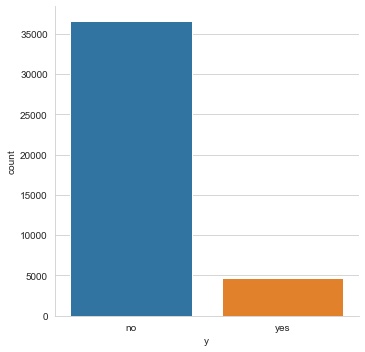

In [16]:
sns.catplot(x = 'y', data =  df, kind = "count")

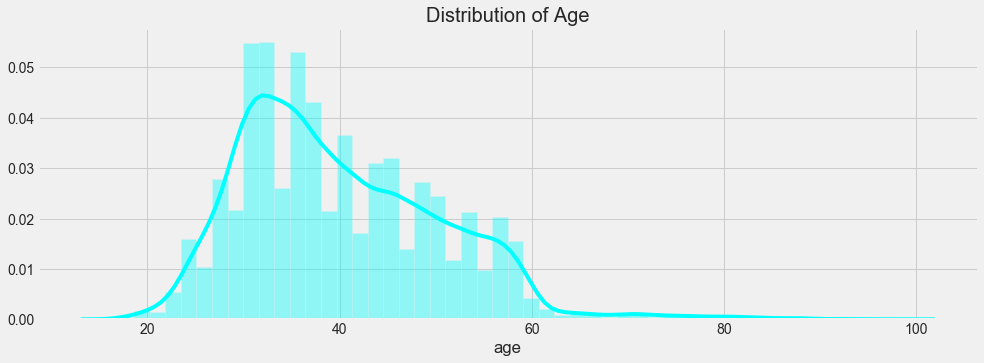

In [17]:
# checking the distribution of age

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 5)
sns.distplot(df['age'], color = 'cyan')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

There is a positive skewness in the age distribution

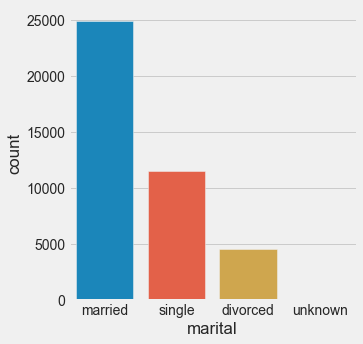

In [18]:
sns.catplot(x = 'marital', data =  df, kind = "count")

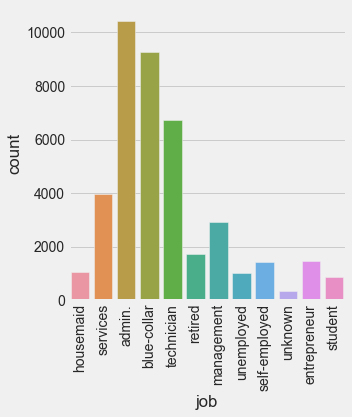

In [19]:
sns.catplot(x = 'job', data =  df, kind = "count")
plt.xticks(rotation = 90)

plt.show()

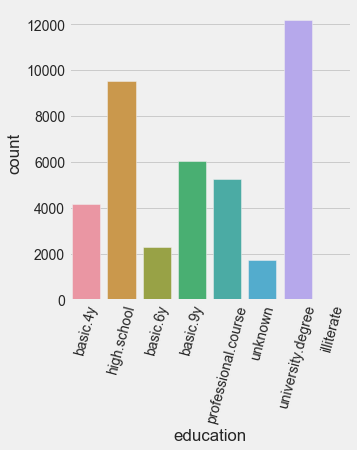

In [20]:
sns.catplot(x = 'education', data =  df, kind = "count")
plt.xticks(rotation = 75)

plt.show()

## Bivariate Analysis

In [21]:
df.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


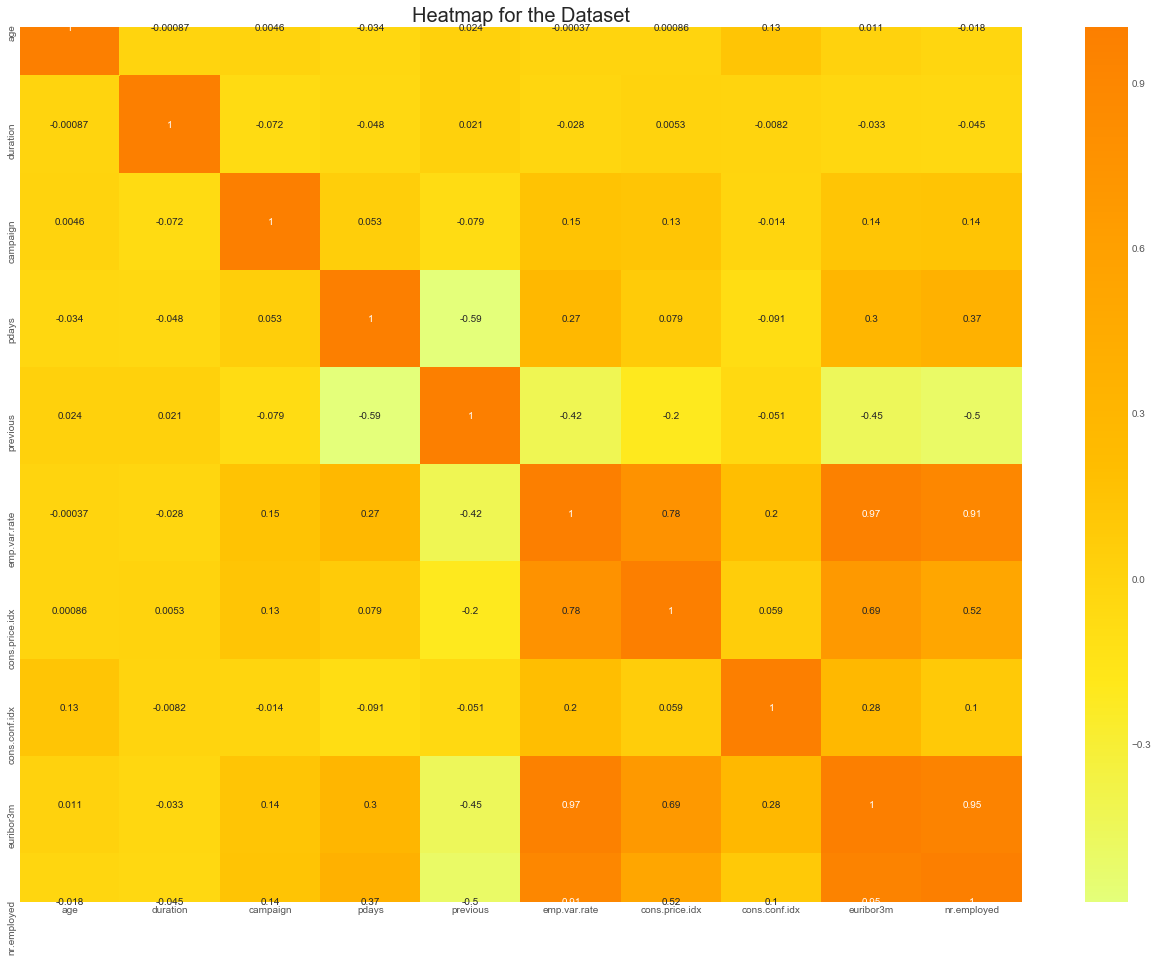

In [22]:
# making heat map

plt.rcParams['figure.figsize'] = (20, 15)
plt.style.use('ggplot')

sns.heatmap(df.corr(), annot = True, cmap = 'Wistia')
plt.title('Heatmap for the Dataset', fontsize = 20)
plt.show()

# Boxplot : Education vs Age vs Target

In [23]:
def boxplot(x, y, data=df, hue = 'y'):
    plot = sns.boxplot(x= x, y=y, hue=hue, data= data)
    plt.xticks( rotation=45, horizontalalignment='right' )
    plt.title("Boxplot of " + " " + x.upper() + " " + "and "+ " " + y.upper())
    return plot

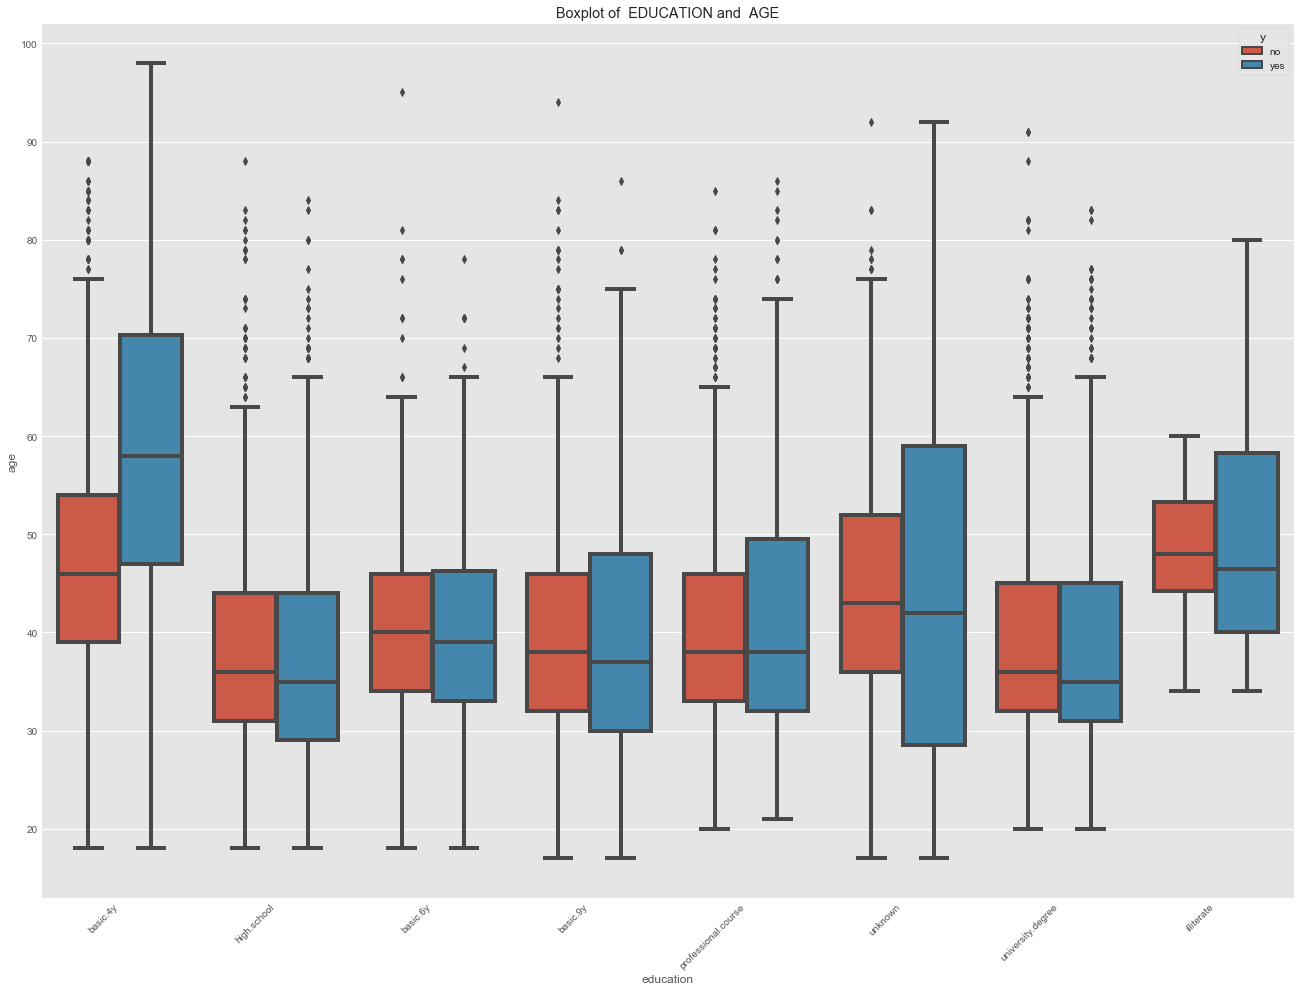

In [24]:
boxplot("education", "age", data=df, hue="y")

# Marital vs Age vs Target

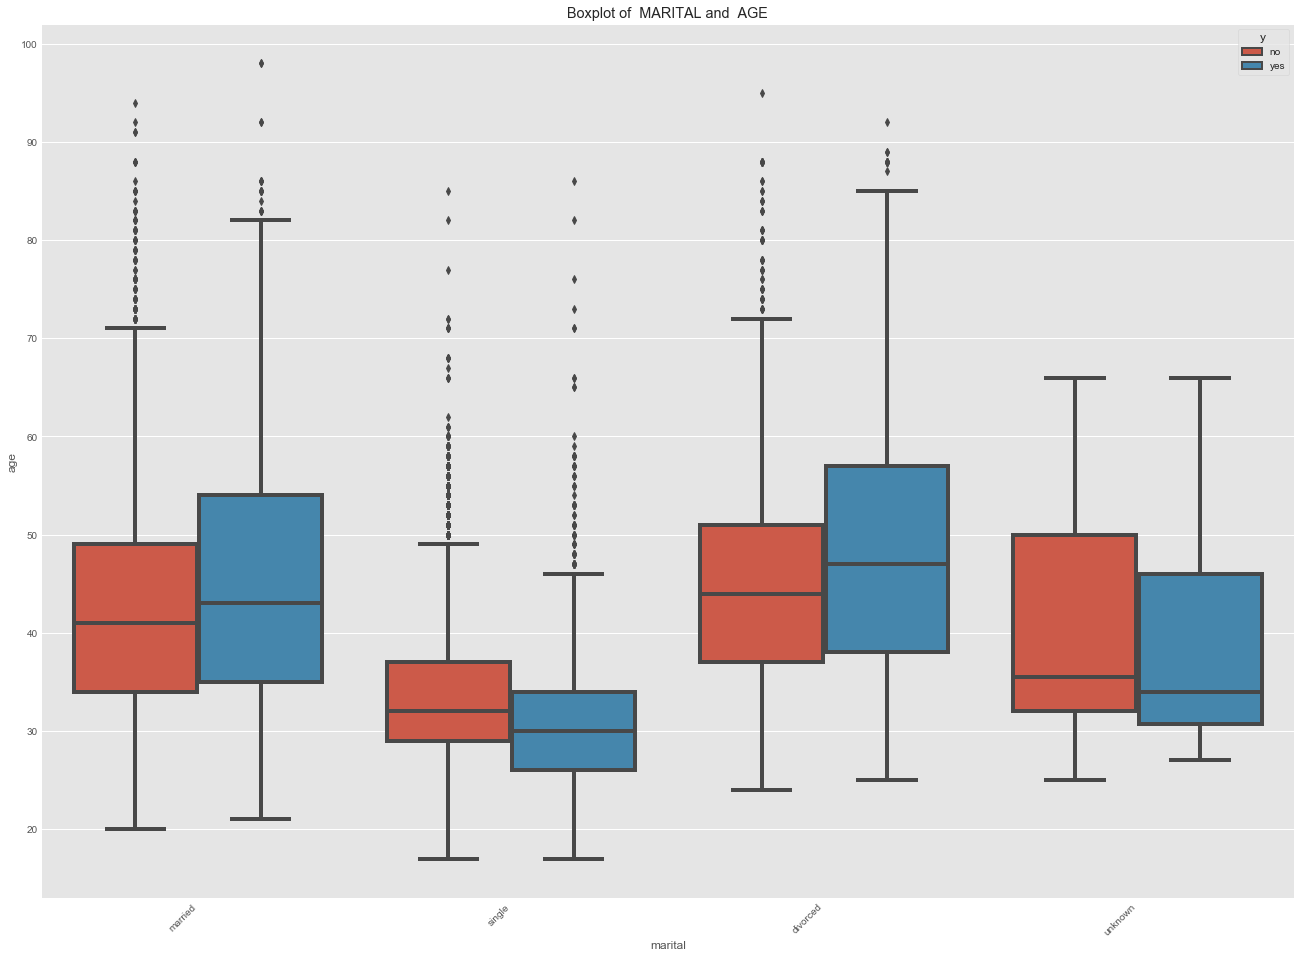

In [25]:
boxplot("marital", "age", data=df, hue= "y")

# Data Preprocessing 

## Dropping Duration column.
This variable highly affects the output target (e.g., if duration=0 then y='no'). Yet the duration is known before a call is performed. Also after the end of the call, y is obviously known. For realistic prediction, duration should be dropped

In [26]:
df = df.drop(['duration'], axis=1)

In [27]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [28]:
df['education'].replace({'basic.9y': 'basic','basic.4y': 'basic','basic.6y':'basic','unknown':'illiterate'},inplace=True)

In [29]:
df['education'].value_counts()

basic                  12513
university.degree      12168
high.school             9515
professional.course     5243
illiterate              1749
Name: education, dtype: int64

In [30]:
df['job'].replace({'self-employed': 'entrepreneur','unknown': 'unemployed'},inplace=True)

In [31]:
df['job'].value_counts()

admin.          10422
blue-collar      9254
technician       6743
services         3969
management       2924
entrepreneur     2877
retired          1720
unemployed       1344
housemaid        1060
student           875
Name: job, dtype: int64

In [32]:
df.shape

(41188, 20)

# Categorical Encoding

In [33]:
# y column
# Binary Encoding
df['subscription'] = np.where(df.y == 'yes', 1, 0)

In [34]:
# categorical columns
# OneHotEncoding
df = pd.get_dummies(df, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month',
                                'day_of_week', 'poutcome'])

In [35]:
df = df.drop(['y'], axis=1)

In [36]:
# reorder columns
columns = [column for column in df.columns if column != 'subscription']
columns = columns + ['subscription']
df = df[columns]

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 58 columns):
age                              41188 non-null int64
campaign                         41188 non-null int64
pdays                            41188 non-null int64
previous                         41188 non-null int64
emp.var.rate                     41188 non-null float64
cons.price.idx                   41188 non-null float64
cons.conf.idx                    41188 non-null float64
euribor3m                        41188 non-null float64
nr.employed                      41188 non-null float64
job_admin.                       41188 non-null uint8
job_blue-collar                  41188 non-null uint8
job_entrepreneur                 41188 non-null uint8
job_housemaid                    41188 non-null uint8
job_management                   41188 non-null uint8
job_retired                      41188 non-null uint8
job_services                     41188 non-null uint8
job_student      

In [38]:
# Scaling numeric columns

# Select numerical columns
num_cols = ['emp.var.rate',"pdays","age", 'cons.price.idx','cons.conf.idx', 'euribor3m', 'nr.employed']

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [39]:
df

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscription
0,1.533034,1,0.195414,0,0.648092,0.722722,0.886447,0.712460,0.331680,0,...,0,0,1,0,0,0,0,1,0,0
1,1.628993,1,0.195414,0,0.648092,0.722722,0.886447,0.712460,0.331680,0,...,0,0,1,0,0,0,0,1,0,0
2,-0.290186,1,0.195414,0,0.648092,0.722722,0.886447,0.712460,0.331680,0,...,0,0,1,0,0,0,0,1,0,0
3,-0.002309,1,0.195414,0,0.648092,0.722722,0.886447,0.712460,0.331680,1,...,0,0,1,0,0,0,0,1,0,0
4,1.533034,1,0.195414,0,0.648092,0.722722,0.886447,0.712460,0.331680,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,3.164336,1,0.195414,0,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,0,...,0,1,0,0,0,0,0,1,0,1
41184,0.573445,1,0.195414,0,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,0,...,0,1,0,0,0,0,0,1,0,0
41185,1.533034,2,0.195414,0,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,0,...,0,1,0,0,0,0,0,1,0,0
41186,0.381527,1,0.195414,0,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,0,...,0,1,0,0,0,0,0,1,0,1


In [40]:
# Create independent and Dependent features
columns = df.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["subscription"]]
# Store the variable we are predicting
target = "subscription"
# Define a random state
state = np.random.RandomState(42)
X = df[columns]
y = df[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# print the shapes of X and Y
print(X.shape)
print(y.shape)

(41188, 57)
(41188,)


# Class Imbalance

In [41]:
LABELS = ["No", "Yes"]

Text(0, 0.5, 'Frequency')

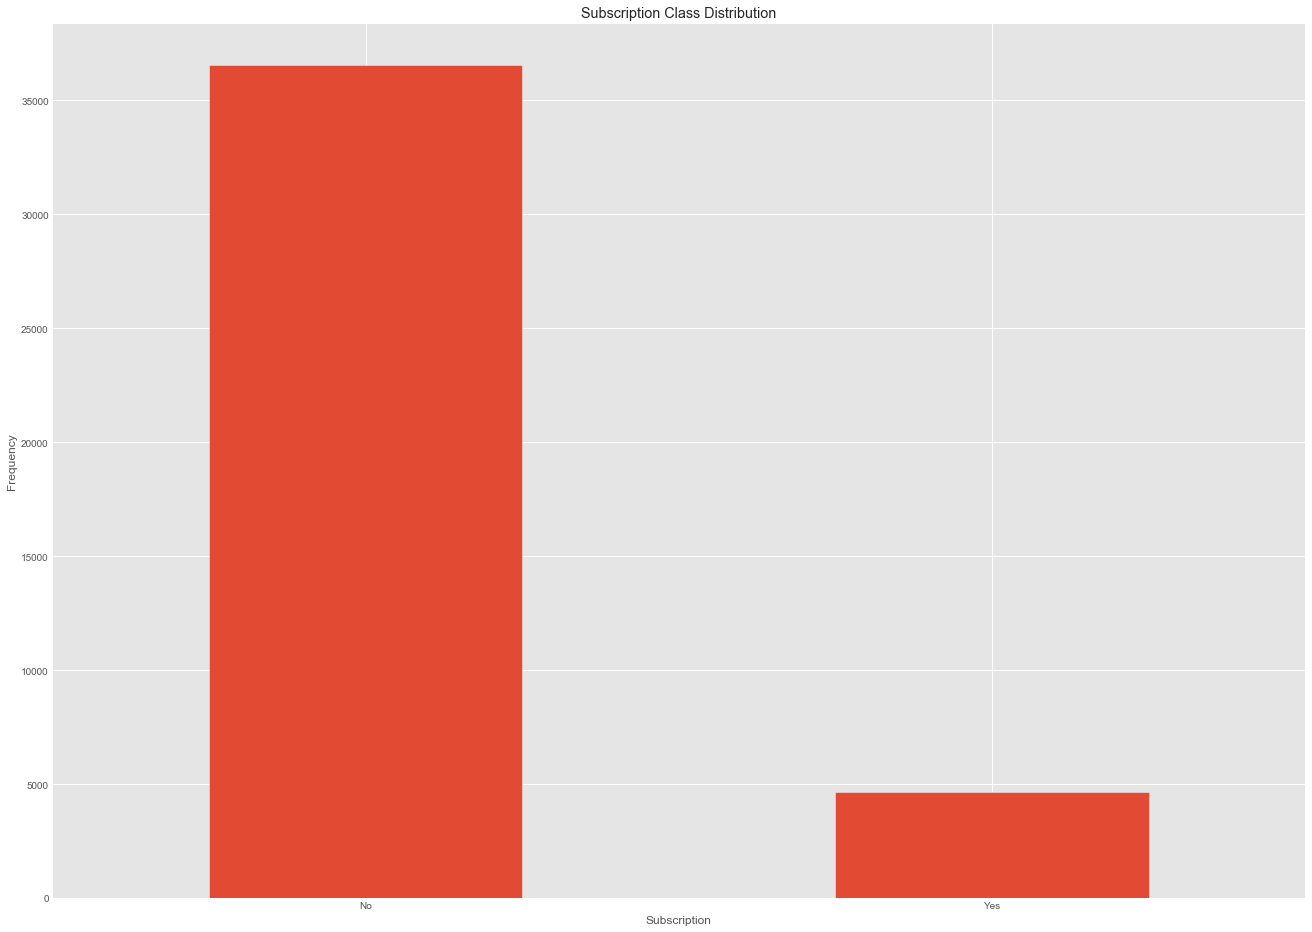

In [42]:
# subscription column : Our target value

count_values = pd.value_counts(df['subscription'], sort = True)

count_values.plot(kind = 'bar', rot = 0)
plt.title("Subscription Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Subscription")
plt.ylabel("Frequency")

There is class imbalance in the target variable, hence the need to improve it. We will use overfitting in this case

In [43]:
# Get the Yes and the No dataset

Yes = df[df["subscription"] == 1]
No = df[df["subscription"] == 0]

print(Yes.shape, No.shape)

(4640, 58) (36548, 58)


# RandomOverSampler to Handle imbalanced Data

In [45]:
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)

In [48]:
X_res.shape

(73096, 57)

In [49]:
y_res.shape

(73096,)

In [51]:
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 36548, 1: 4640})
Resampled dataset shape Counter({0: 36548, 1: 36548})


# Principal Component Analysis

In [52]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)
pca.fit(X_res)
X = pca.transform(X_res)

In [53]:
principal_df = pd.DataFrame(data = X
             , columns = ['PC_1', 'PC_2','PC_3', 'PC_4','PC_5','PC_6', 'PC_7',
                          'PC_8', 'PC_9','PC_10'])
principal_df

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10
0,0.276944,-2.230399,1.150124,1.734002,0.584386,0.719141,0.792006,0.370514,-0.395619,-0.063764
1,0.325374,-2.277042,1.198136,1.756201,0.585581,0.716771,0.773524,0.334053,-0.482108,0.034573
2,0.305620,-2.285825,0.962685,0.331187,-0.654679,0.693920,-0.564431,0.758480,-0.335263,-0.397097
3,0.313296,-2.287642,1.025324,0.619021,-0.431386,0.810311,0.777654,0.351395,-0.399022,-0.555091
4,0.271688,-2.218918,1.137018,1.606690,0.457540,0.723468,0.585276,0.018531,-0.600335,-0.078790
...,...,...,...,...,...,...,...,...,...,...
73091,-1.469728,-0.584022,-1.701829,-1.001278,0.649514,-0.461925,0.047050,1.814829,0.093116,-0.202824
73092,-1.917452,-0.030917,-1.205805,0.121525,-1.060019,1.826830,-0.469992,1.109013,-0.068760,-0.401803
73093,-1.771846,-0.215570,-1.600709,-1.517802,0.324427,-0.196511,1.149547,0.603137,0.774885,0.751914
73094,-0.834297,0.271156,-1.564498,0.494957,2.249352,-0.581621,-0.744562,-0.381061,-0.593668,-0.220771


# Saved preprocessed data

In [63]:
processed_data_path = os.path.join(os.path.pardir, 'data','processed')
write_train_path = os.path.join(processed_data_path, 'train.csv')
write_test_path = os.path.join(processed_data_path, 'test.csv')

In [64]:
# train data
principal_df.to_csv(write_train_path, index=False)
#test data
y_res.to_csv(write_test_path, index=False)